In [1]:
import time
import os
import matplotlib.pyplot as plt
import numpy as np
#from tqdm.autonotebook import tqdm, trange
#from tqdm.notebook import trange, tqdm
from tqdm import tnrange, tqdm_notebook
import random
import binascii
import pickle

import chipwhisperer as cw

In [2]:
# Notebook settings
%matplotlib notebook

In [3]:
scope = cw.scope()
target = cw.target(scope)

OSError: USB Device not found. Did you connect it first?

In [4]:
scope.gain.gain = 45
scope.adc.samples = 2500
scope.adc.offset = 0
scope.adc.basic_mode = "rising_edge"
scope.clock.clkgen_freq = 8000000
scope.clock.adc_src = "clkgen_x4"
scope.trigger.triggers = "tio4"
scope.io.tio1 = "serial_tx"
scope.io.tio2 = "serial_rx"
scope.io.hs2 = "clkgen"
target.ser.setBaud(38400)

NameError: name 'scope' is not defined

In [5]:
def reset_target(scope):
    scope.io.nrst = 'low'
    time.sleep(0.05)
    scope.io.nrst = 'high'
    time.sleep(0.05)
def plot(x):
    plt.figure()
    for i in x:
        plt.plot(i)
    plt.show()
    
def print_response():
    resp = ""
    num_char = target.in_waiting()
    while num_char > 0:
        resp += target.read(timeout=10)
        time.sleep(0.05)
        num_char = target.in_waiting()
    print(resp) 

In [6]:
def get_trace(key, plaintext):
    scope.arm()
    target.flush()

    target.write(b'k' + key + b'\r\n')
    #target.simpleserial_wait_ack()

    target.write(b'p' + plaintext + b'\r\n')
    ret = scope.capture()
    #target.read(timeout=10)
    #print_response()
    #print(scope.adc.trig_count)
    if ret:
        print('Timeout happened during acquisition')
    time.sleep(0.01)
    
    return scope.get_last_trace(), scope.adc.trig_count

In [7]:
HW = [bin(n).count("1") for n in range(0,256)]
sbox=(
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16
)
def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]
def key2int(key,i):
    return int(key[2*i:2*(i+1)],16)

In [8]:
key1 = b'E0D541314E00102D6DFCA8BC007B6C8A'
plaintext1 = b'691898984bf5587e82f3d24a5e7dc722'
t, c = get_trace(key1, plaintext1)

NameError: name 'scope' is not defined

In [9]:
plot((t,))
print(c)

NameError: name 't' is not defined

In [ ]:
traces = {}
#plaintexts = []
key = '{:032x}'.format(random.getrandbits(128))

In [ ]:
for i in tnrange(1000, desc='Capturing traces'):
    p = '{:032x}'.format(random.getrandbits(128))
    t, l = get_trace(key.encode(), p.encode())
    p = bytearray(binascii.unhexlify(p))
    try:
        traces[l].append([p,t])
    except KeyError:
        traces[l] = [[p,t]]
        print(l)

In [ ]:
packet = (key, traces)
pickle.dump(packet, open('traces_cpa.pkl', 'wb'))
#trace_packet = pickle.load(open('trace_packet_0.pkl', 'rb'))

## Loading collected traces

In [10]:
(key, traces) = pickle.load(open('traces_cpa.pkl', 'rb'))

In [11]:
#Displaying number of traces
for i in traces.keys():
    print(str(i) + ' ' + str(len(traces[i])))

444 996
888 4


## Cutting collected traces to the length of SubBytes

In [12]:

for i in traces.keys():
    for j in range(len(traces[i])):
        traces[i][j][1] = traces[i][j][1][:i]

### Displaying two first traces of the batch

<IPython.core.display.Javascript object>


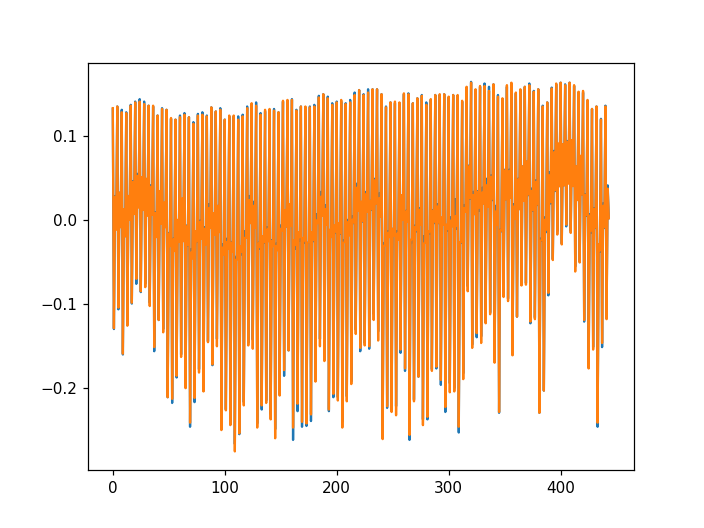

In [13]:
plot((traces[444][0][1], traces[444][1][1]),)

In [14]:
len(traces[444])

996

In [15]:
traces2 = traces[444]

In [16]:
#Check
len(traces2)

996

<IPython.core.display.Javascript object>


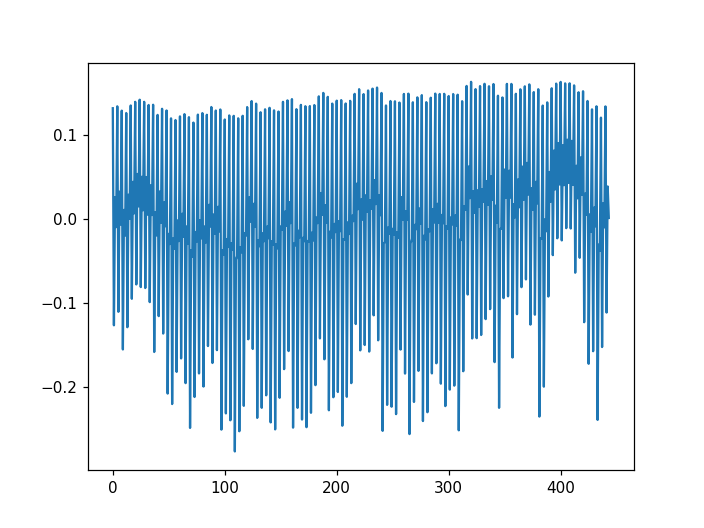

In [17]:
#Mean trace
meantrace = np.zeros(444)

for i in range(len(traces2)):
    meantrace += traces2[i][1]

meantrace = meantrace/len(traces2)

plot((meantrace,))

In [18]:
def f(key, guess):
    guessed = 0
    for i in range(16):
        if (key[2*i]==guess[2*i] and key[2*i+1]==guess[2*i+1]):
            print("{} {}{}".format(i,key[2*i], key[2*i+1]))
            guessed +=1
    print('Guessed: {}'.format(guessed)) 

## Loading indices from profiling

In [19]:
indices_sbox = pickle.load(open('indices_sbox', 'rb'))

In [20]:
indices_sbox_xor_pt_kb = pickle.load(open('indices_sbox_xor_pt_kb', 'rb'))

## Actual CPA

In [21]:
tracelen = 444
tnum = len(traces2)


meantrace = np.zeros(tracelen)
for i in range(tnum):
    meantrace += traces2[i][1]
    

meantrace = meantrace/tnum

best_guesses = []
for sk in tnrange(16, desc='Processing subkeys'):
    ris = []
    for kg in tnrange(256, desc='Processing subkey ' + str(sk)):
        
        hs = []
        for t in range(tnum):
            hs.append(HW[sbox[traces2[t][0][sk]^kg]^traces2[t][0][sk]^kg])
        meanh = np.mean(hs, dtype=np.float64)
        
        covht = np.zeros(tracelen)
        varh = np.zeros(tracelen)
        vart = np.zeros(tracelen)
        
        for d in range(tnum):
            hdiff = hs[d] - meanh
            tdiff = traces2[d][1][indices_sbox_xor_pt_kb[sk]] - meantrace[indices_sbox_xor_pt_kb[sk]]
            covht += hdiff*tdiff
            varh += hdiff**2
            vart += tdiff**2
        
        rs = covht / np.sqrt(varh * vart)
        np.nan_to_num(rs, copy=False)
        
        hs = []
        for t in range(tnum):
            hs.append(HW[sbox[traces2[t][0][sk]^kg]])
        meanh = np.mean(hs, dtype=np.float64)
        
        covht = np.zeros(tracelen)
        varh = np.zeros(tracelen)
        vart = np.zeros(tracelen)
        
        for d in range(tnum):
            hdiff = hs[d] - meanh
            tdiff = traces2[d][1][indices_sbox[sk]] - meantrace[indices_sbox[sk]]
            covht += hdiff*tdiff
            varh += hdiff**2
            vart += tdiff**2
        
        rs2 = covht / np.sqrt(varh * vart)
        np.nan_to_num(rs2, copy=False)
        
        best_correlation = max(abs(rs)) + max(abs(rs2))
        ris.append(best_correlation)
    
    guesses = [(b, r) for b, r in enumerate(ris)]
    guesses_sorted = sorted(guesses, key=lambda x: x[1], reverse=True)
    
    print('Key for byte {}{}'.format(key[2*sk],key[2*sk+1]))
    print('Best guesses for byte {}:'.format(sk))
    for b, r in guesses_sorted[:8]:
        print('{:02x} ({})'.format(b, r))
    
    best_guesses.append(guesses_sorted)

/home/user/my_project_dir/my_project_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  del sys.path[0]


/home/user/my_project_dir/my_project_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  from ipykernel import kernelapp as app



Key for byte 8d
Best guesses for byte 0:
8d (0.546410689646196)
56 (0.24346633233042048)
e1 (0.24213570933438222)
99 (0.2138764892340001)
a8 (0.21044719877887463)
0c (0.19519887701312527)
3c (0.1926836297089454)
91 (0.1834050220963534)



Key for byte 1d
Best guesses for byte 1:
1d (0.2245703890779284)
19 (0.19460039479091087)
c1 (0.19238553039345005)
5b (0.1831582163831873)
40 (0.17758528926111186)
1e (0.1730980063188152)
dd (0.16664201299962528)
4d (0.16580660706008715)



Key for byte 62
Best guesses for byte 2:
62 (0.3730553796050168)
c0 (0.19585500492164853)
f0 (0.1903135414126355)
4d (0.18108446410147083)
fa (0.17936067757840368)
d6 (0.17771460019702287)
e6 (0.17741828795314346)
74 (0.1763904153300248)



Key for byte 70
Best guesses for byte 3:
70 (0.38283470041284484)
0c (0.20148204634506378)
91 (0.1859061935852059)
b9 (0.1853209487099295)
01 (0.1765173490650161)
21 (0.1622640262969106)
34 (0.16224243403847904)
f1 (0.15918847579085602)



Key for byte d6
Best guesses for byte 4:
d6 (0.325083066281982)
cb (0.20085214326253764)
8a (0.18714873101205878)
65 (0.1713999218003688)
fc (0.1627353057046776)
94 (0.1589668811917996)
cf (0.15314726859778305)
8f (0.14969148497091672)



Key for byte 76
Best guesses for byte 5:
76 (0.27820214583932346)
32 (0.17130604289327184)
2a (0.16928307943414317)
d8 (0.1469875029447556)
4f (0.1335033679195145)
44 (0.13187990867691468)
c3 (0.12997435041482724)
19 (0.12800278811227392)



Key for byte 71
Best guesses for byte 6:
71 (0.3590443615748857)
e3 (0.2160634171291993)
03 (0.21337126882157276)
79 (0.18982311373607313)
ae (0.18605554157399834)
ed (0.18560773594709304)
62 (0.17440404430527737)
c9 (0.17383217922152394)



Key for byte 48
Best guesses for byte 7:
48 (0.42524014744064265)
fd (0.2176549280377394)
f6 (0.18550153345296808)
81 (0.17775044121768457)
e6 (0.17105657472980942)
b8 (0.16681956916226487)
21 (0.16561839426275826)
05 (0.16437856197556455)



Key for byte aa
Best guesses for byte 8:
aa (0.3485421482426855)
f6 (0.25446286912736404)
5f (0.21779870077362157)
c3 (0.20403717472698166)
33 (0.19710701660142463)
03 (0.1892980916187112)
3c (0.1739178617938983)
19 (0.1729678604042171)



Key for byte 0f
Best guesses for byte 9:
0f (0.4662412579442551)
dc (0.21329473383113529)
60 (0.21294568554175866)
d9 (0.19684810609398629)
b9 (0.18647857983934416)
48 (0.18312091963069174)
98 (0.18087052561526423)
19 (0.18069473509755915)



Key for byte d6
Best guesses for byte 10:
d6 (0.236470176557084)
65 (0.18926369219943764)
92 (0.16976925816652608)
b1 (0.15776118677639073)
a6 (0.1481667084807334)
98 (0.14800568992125673)
5b (0.14467639489631884)
94 (0.1432823078247408)



Key for byte 0c
Best guesses for byte 11:
0c (0.3376813712589976)
e8 (0.17211293786801526)
fd (0.16129483811883571)
63 (0.1356120421673016)
24 (0.13486751852879766)
c2 (0.13231266435122963)
a4 (0.12425769209477694)
c1 (0.11874556324269775)



Key for byte 50
Best guesses for byte 12:
50 (0.3457659387884785)
d4 (0.16320393239850503)
5f (0.16243390523873208)
61 (0.1530447645848578)
b1 (0.14844675166031238)
67 (0.1472949279754897)
89 (0.14643004082081654)
47 (0.14471438272497944)



Key for byte 54
Best guesses for byte 13:
54 (0.27759506865138545)
cc (0.19269789206613497)
64 (0.15827689463641334)
23 (0.14893508533342373)
f8 (0.14244837895734971)
08 (0.14077663325019535)
2b (0.1399476137815197)
37 (0.13584194104813227)



Key for byte 98
Best guesses for byte 14:
98 (0.3329222090741722)
52 (0.2511708282607362)
08 (0.233443675166784)
4c (0.20692799017446517)
ac (0.1904694551726213)
7c (0.18442850625505586)
d6 (0.1830088052569093)
25 (0.16928212130493456)



Key for byte 03
Best guesses for byte 15:
03 (0.6871978178046554)
6c (0.34757742146209814)
31 (0.23900583521744556)
20 (0.2362621478992768)
b3 (0.22277140103807613)
d0 (0.21617959873838516)
06 (0.21463208132037442)
19 (0.2025779678504704)



In [22]:
guess = ''.join('{:02x}'.format(b[0][0]) for b in best_guesses)

In [23]:
print('Real key:  ', key[:])
print('Best guess:', guess)

Real key:   8d1d6270d6767148aa0fd60c50549803
Best guess: 8d1d6270d6767148aa0fd60c50549803


In [24]:
f(key, guess)

0 8d
1 1d
2 62
3 70
4 d6
5 76
6 71
7 48
8 aa
9 0f
10 d6
11 0c
12 50
13 54
14 98
15 03
Guessed: 16


In [ ]:
# cleanup the connection to the target and scope
scope.dis()
target.dis()
#pip install chipwhisperer